In [130]:
import numpy as np 
import yfinance as yf 
import matplotlib.pyplot as plt
import pandas as pd 

# Predictable Sequences in Market data to make informed decisions. 

In [131]:
# Function to generate synthetic stock prices
def generate_synthetic_prices(start_date, end_date, initial_price, daily_returns_mean, daily_returns_std):
    date_range = pd.date_range(start=start_date, end=end_date, freq='B')
    returns = np.random.normal(loc=daily_returns_mean, scale=daily_returns_std, size=len(date_range))
    prices = initial_price * np.exp(np.cumsum(returns))
    return pd.Series(prices, index=date_range)


In [132]:
# Define parameters for synthetic data
start_date = '2023-01-01'
end_date = '2023-12-31'
initial_price = 100.0
daily_returns_mean = 0.0050  # Mean daily return
daily_returns_std = 0.030  # Standard deviation of daily returns

In [133]:
# Generate synthetic stock prices
synthetic_prices = generate_synthetic_prices(start_date, end_date, initial_price, daily_returns_mean, daily_returns_std)


In [134]:
synthetic_prices[:-5]

2023-01-02    100.234570
2023-01-03    100.103552
2023-01-04    105.153979
2023-01-05    105.818090
2023-01-06    106.794708
                 ...    
2023-12-18    683.972417
2023-12-19    709.952256
2023-12-20    743.412403
2023-12-21    713.034302
2023-12-22    714.362788
Freq: B, Length: 255, dtype: float64

In [135]:
# Fetch real stock prices for comparison
symbol = '^IRX'
real_prices = yf.download(symbol, start=start_date, end=end_date)['Close']

[*********************100%%**********************]  1 of 1 completed


In [136]:
real_prices.tail()

Date
2023-11-15    5.255
2023-11-16    5.243
2023-11-17    5.233
2023-11-20    5.238
2023-11-21    5.263
Name: Close, dtype: float64

In [137]:
real_prices.mean()




5.0236741197960715

In [138]:
real_prices.std()

0.3015546071521312

# Visualizations Treasury Bills 

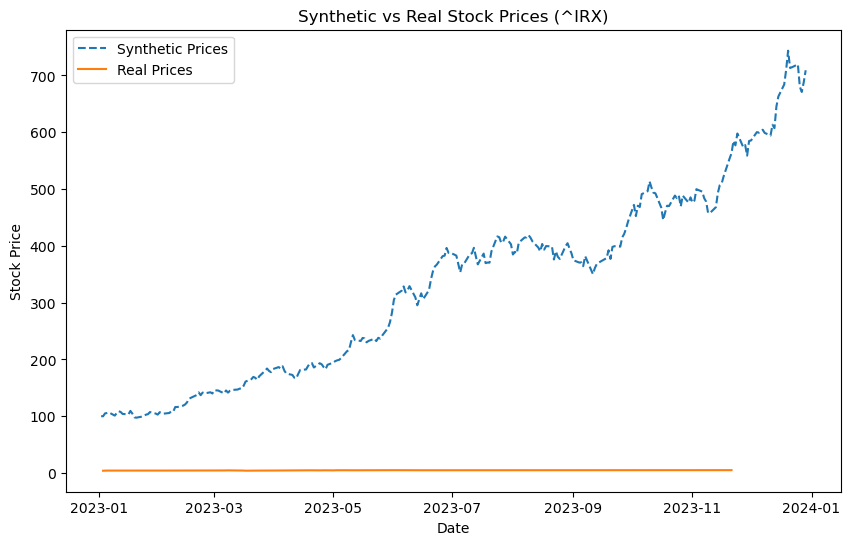

In [139]:
# Plot synthetic and real stock prices
plt.figure(figsize=(10, 6))
plt.plot(synthetic_prices, label='Synthetic Prices', linestyle='--')
plt.plot(real_prices, label='Real Prices', linestyle='-')
plt.title(f'Synthetic vs Real Stock Prices ({symbol})')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Markov Chains  Markov chain over time to generate a path of interest rate movements . This simulation can help analyze possible future interest rate scenarios.

In [167]:
# Fetch 10-Year Constant Maturity Rate from FRED using yfinance
symbol = '^IRX'
data = yf.download(symbol, start='2000-01-01', end='2023-12-31')['Close']

[*********************100%%**********************]  1 of 1 completed


In [168]:
# Calculat# Define states based on rate movements (e.g., Up and Down)
threshold = 0.0
states = np.where(returns > threshold, 'Up', 'Down')
returns = data.pct_change().dropna()

In [169]:
# Calculate transition probabilities
transition_matrix = np.zeros((2, 2))
for i in range(1, len(states)):
    current_state = 0 if states[i - 1] == 'Down' else 1
    next_state = 0 if states[i] == 'Down' else 1
    transition_matrix[current_state, next_state] += 1

transition_matrix /= np.sum(transition_matrix, axis=1)[:, np.newaxis]

In [170]:
# Print transition matrix
print("Transition Probability Matrix:")
print(transition_matrix)

Transition Probability Matrix:
[[0.59664105 0.40335895]
 [0.56890317 0.43109683]]


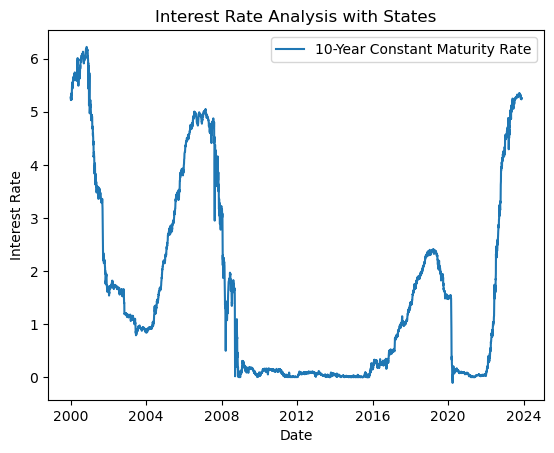

In [171]:
# Plot the historical rate and states
plt.plot(data.index, data, label='10-Year Constant Maturity Rate')
plt.title('Interest Rate Analysis with States')
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.legend()
plt.show()